*PART 2: EDA*

***

# What This Part is About?

This part is basic EDA.

We want to meet our data, see what's important, what are the distributions and somewhat.

So let's get into it.

# Data and Module Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utilities import *

warnings.filterwarnings('ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

df = pd.read_csv('./prepared_data.csv', index_col=0)

df.head()

,loan_amnt,title,risk_score,dti,addr_state,emp_length,target
0,3600.0,Debt consolidation,679.0,5.91,PA,10+ years,1
1,24700.0,Business,719.0,16.06,SD,10+ years,1
2,35000.0,Debt consolidation,789.0,17.06,NJ,10+ years,1
3,10400.0,Major purchase,699.0,25.37,PA,3 years,1
4,11950.0,Debt consolidation,694.0,10.20,GA,4 years,1


# 3. EDA

## 3.1. Loan Status

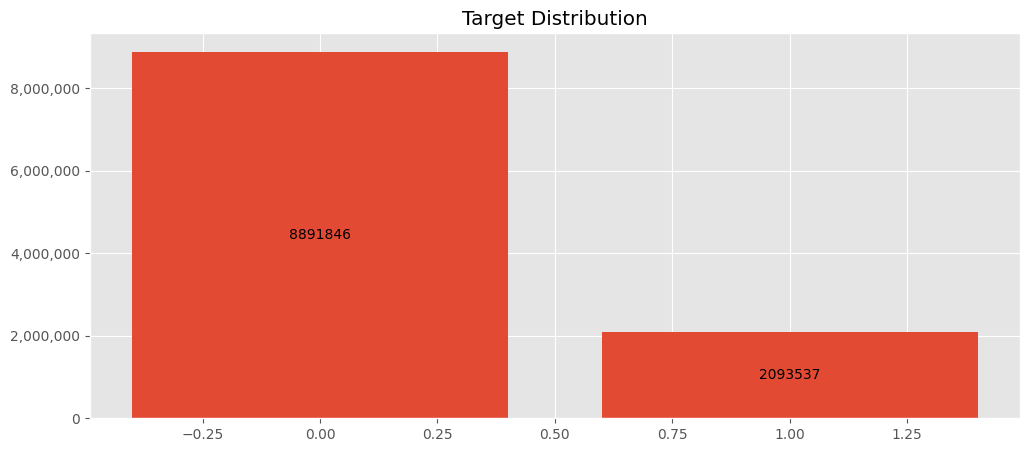

In [2]:
count_plot(df, 'target', hue=None)

plt.title('Target Distribution')

plt.show()

We can see that the data is quite unbalanced with more loans being rejected, almost four times as much.

In [3]:
2044560 / (8881928 + 2044560)

0.18711959414589574

There are 18.7% accepted loans.

## 3.2. Loan Amount

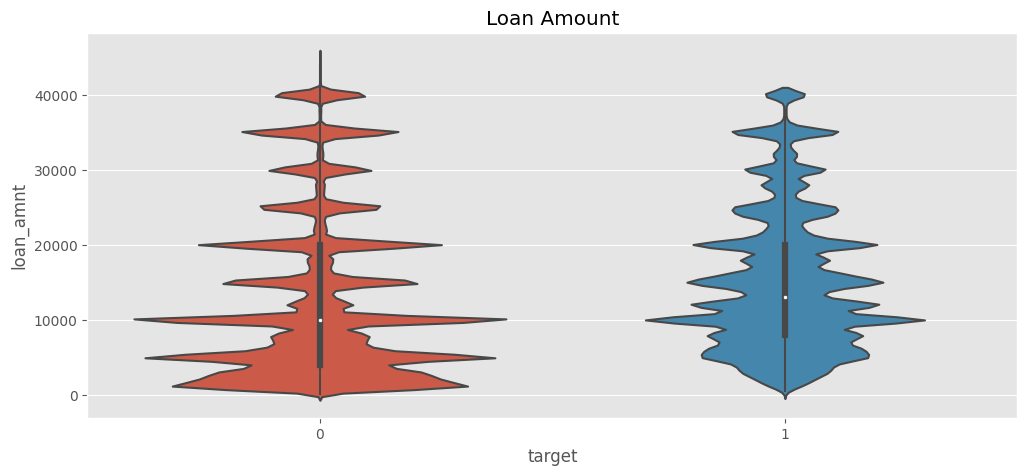

In [4]:
sns.violinplot(df, y='loan_amnt', x='target')

plt.title('Loan Amount')

plt.show()

We can see that for rejected and accepted most loan requests were made for 10000$.

If the amount of the loan is lower than 5000 it is more likely to be rejected.

Most of the rejected loans are dividable by 5000, while for accepted there is more variation.

## 3.3. Employment Length

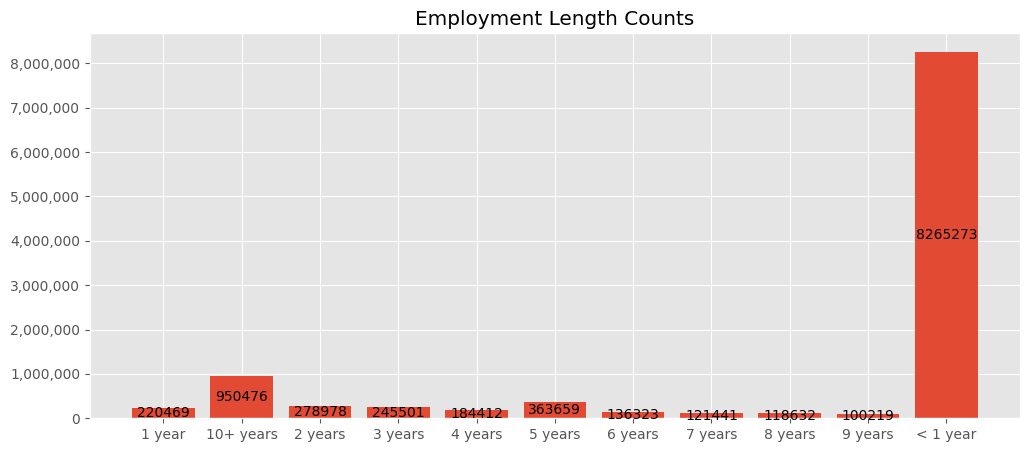

In [5]:
count_plot(df, 'emp_length')

plt.title('Employment Length Counts')

plt.show()

Most loan requests were made by people who have worked for less than 1 year for their current employer.

Second biggest count is of clients who have worked for over 10 years.

Lowest number is of people who have worked for 9 years.

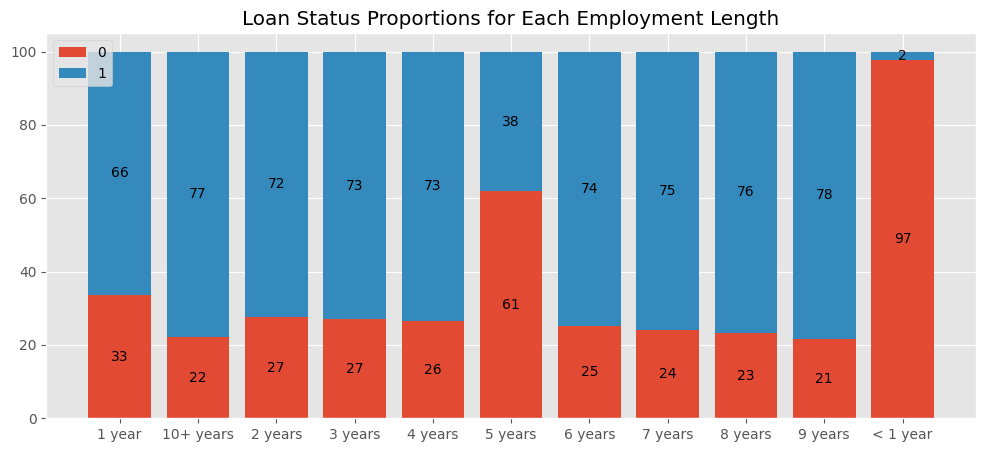

In [6]:
stacked_plot(df, 'emp_length', 'target')

plt.title('Loan Status Proportions for Each Employment Length')

plt.show()

There is only 2% chance to receive a loan if you have worked for less than 1 year.

Highest chance is if you have worked for 10+ years.

Interestingly, 5 years has second lowest chance to receive a loan. Maybe it is an amount that people pick if they are not sure or straight up lying.

## 3.4. Risk Score

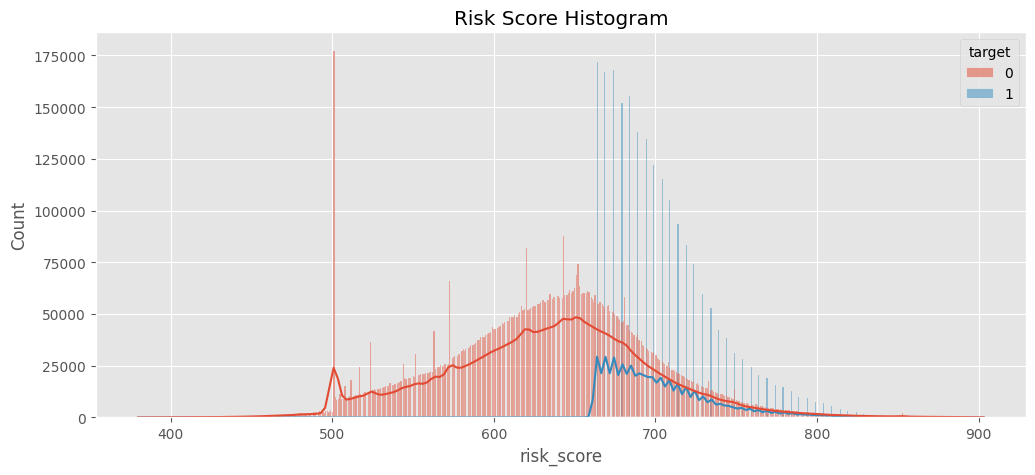

In [7]:
sns.histplot(df, x='risk_score', hue='target', kde=True)

plt.title('Risk Score Histogram')

plt.show()

In [8]:
df[df['target'] == 1]['risk_score'].min()

614.0

It seems the higher the score goes, the better.

Accepted loans only start above around 614 risk score.

## 3.6. Correlations with Target

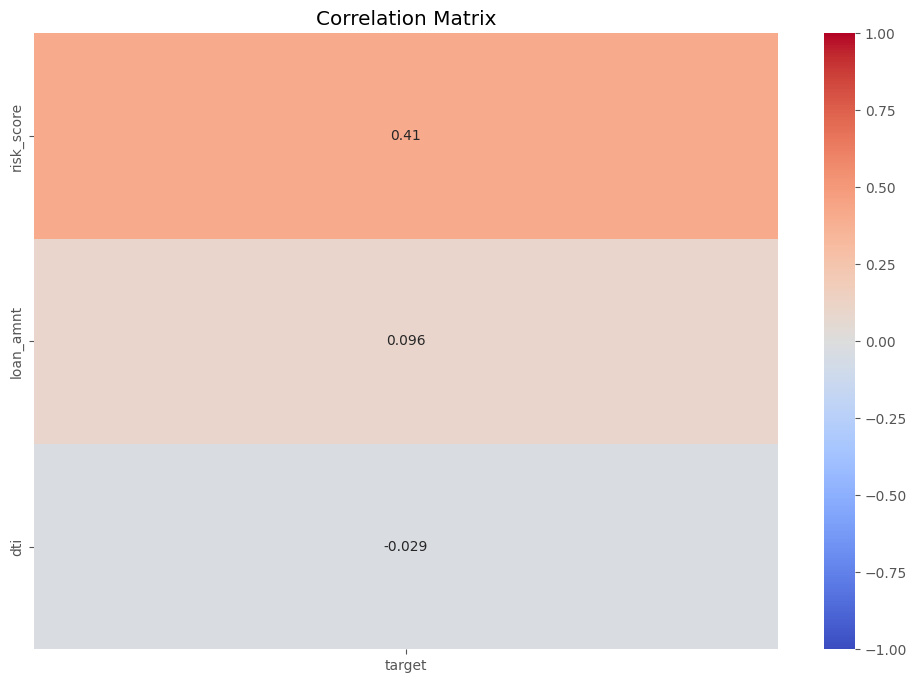

In [9]:
plt.figure(figsize=(12,8))

col = df.corr().loc['target', :].sort_values(ascending=False)

sns.heatmap(col.to_frame().drop('target'), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix')

plt.show()

We can see Risk Score is quite correlated with target, while loan amount or DTI are almost neutral.

***

# End of Second Part

What we have learned?

* There is veryy low chance to get a loan if you have worked for less than a year ar your current company;
* Having a risk score below 614 means you probably won't get a loan;
* Theoretically, if you are asking for a loan, choose an amount over 5000.

What will we be doing in another part?

* Since the data has been prepared beforehand, we will dive into model training for our first step of our 3-step process.